Univariate, Bivariate and Multivariate Analysis

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

Import to colab

In [9]:
df=pd.read_csv('your_data.csv')

In [10]:
df.head()

Unnamed: 0  Cholesterol  triglyceride  age  hearing(right)  hemoglobin  \
0           0          172           300   55               1        16.5   
1           1          194            55   70               2        16.2   
2           2          178           197   20               1        17.4   
3           3          180           203   35               1        15.9   
4           4          155            87   30               1        15.4   

   LDL  dental caries  systolic  hearing(left)  eyesight(left)  smoking  
0   75              0       135              1             0.5        1  
1  126              1       146              2             0.6        0  
2   93              0       118              1             0.4        1  
3  102              1       131              1             1.5        0  
4   93              0       121              1             1.5        1

In [11]:
df.shape

(159256, 12)

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      159256 non-null  int64  
 1   Cholesterol     159256 non-null  int64  
 2   triglyceride    159256 non-null  int64  
 3   age             159256 non-null  int64  
 4   hearing(right)  159256 non-null  int64  
 5   hemoglobin      159256 non-null  float64
 6   LDL             159256 non-null  int64  
 7   dental caries   159256 non-null  int64  
 8   systolic        159256 non-null  int64  
 9   hearing(left)   159256 non-null  int64  
 10  eyesight(left)  159256 non-null  float64
 11  smoking         159256 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 14.6 MB
None


In [13]:
df.duplicated().sum()

0

Information about the dataset:
- There are 159,256 samples in total
- There are no samples containing null
- There are no duplicate samples
- There are 10 features to be explored

------------------------------------------------------------- Univariate Analysis ---------------------------------------------------------------------
It focuses on understanding the characteristics and distribution of a single feature in our dataset

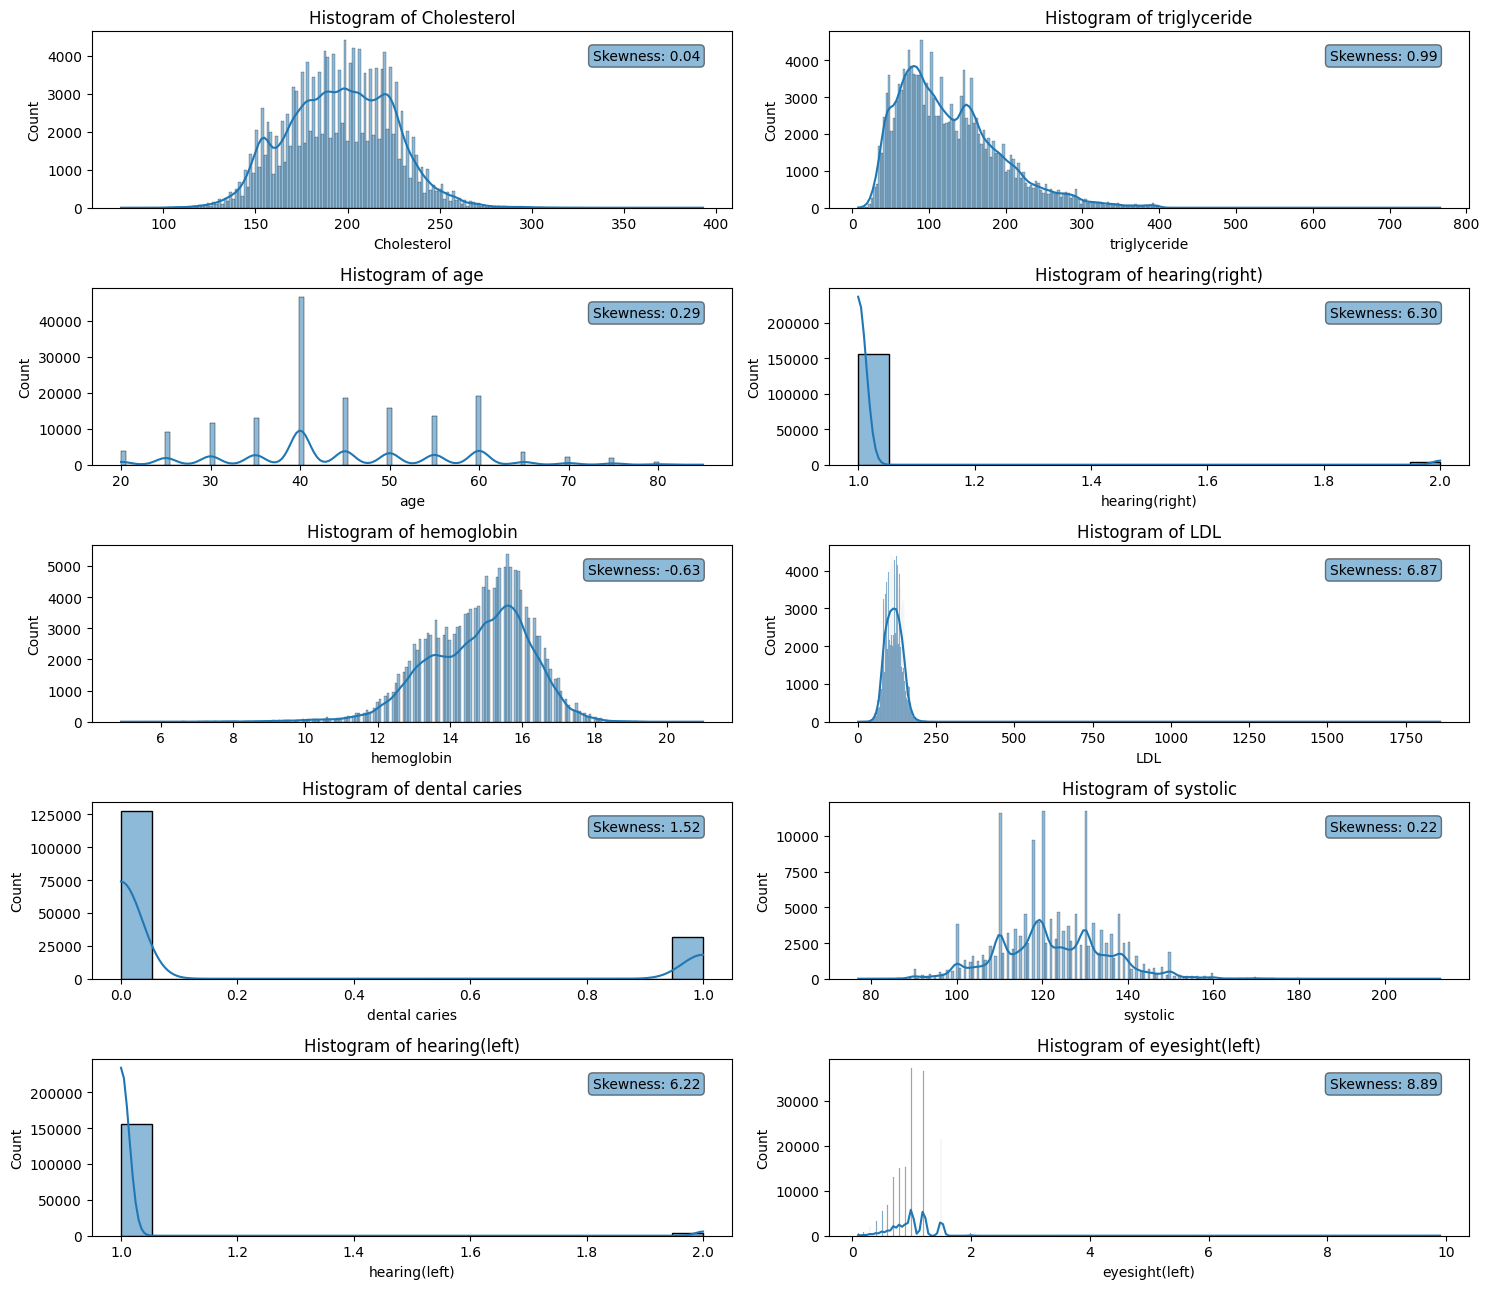

In [14]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 13))
axes = axes.flatten()

# kde=true :kernel density estimate on top of the histogram

for i, column_name in enumerate(['Cholesterol','triglyceride','age','hearing(right)','hemoglobin','LDL', 'dental caries', 'systolic','hearing(left)','eyesight(left)' ]):
    sns.histplot(df[column_name], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column_name}')
    skewness_value = skew(df[column_name])
    axes[i].text(0.95, 0.9, f'Skewness: {skewness_value:.2f}', transform=axes[i].transAxes, ha='right', va='top', bbox=dict(boxstyle='round', alpha=0.5))

plt.tight_layout()
plt.show()

Below is the descriptive statistics of each feature:

In [15]:
df[['Cholesterol','triglyceride','age','hearing(right)','hemoglobin','LDL', 'dental caries', 'systolic','hearing(left)','eyesight(left)' ]].describe()

Cholesterol   triglyceride            age  hearing(right)  \
count  159256.000000  159256.000000  159256.000000   159256.000000   
mean      195.796165     127.616046      44.306626        1.023421   
std        28.396959      66.188989      11.842286        0.151238   
min        77.000000       8.000000      20.000000        1.000000   
25%       175.000000      77.000000      40.000000        1.000000   
50%       196.000000     115.000000      40.000000        1.000000   
75%       217.000000     165.000000      55.000000        1.000000   
max       393.000000     766.000000      85.000000        2.000000   

          hemoglobin            LDL  dental caries       systolic  \
count  159256.000000  159256.000000  159256.000000  159256.000000   
mean       14.796965     114.607682       0.197996     122.503648   
std         1.431213      28.158931       0.398490      12.729315   
min         4.900000       1.000000       0.000000      77.000000   
25%        13.800000      95.000000       0.000000     114.000000   
50%        15.000000     114.000000       0.000000     121.000000   
75%        15.800000     133.000000       0.000000     130.000000   
max        21.000000    1860.000000       1.000000     213.000000   

       hearing(left)  eyesight(left)  
count  159256.000000   159256.000000  
mean        1.023974        1.005798  
std         0.152969        0.402113  
min         1.000000        0.100000  
25%         1.000000        0.800000  
50%         1.000000        1.000000  
75%         1.000000        1.200000  
max         2.000000        9.900000


Below is a boxplot graph to represent the statistics above:

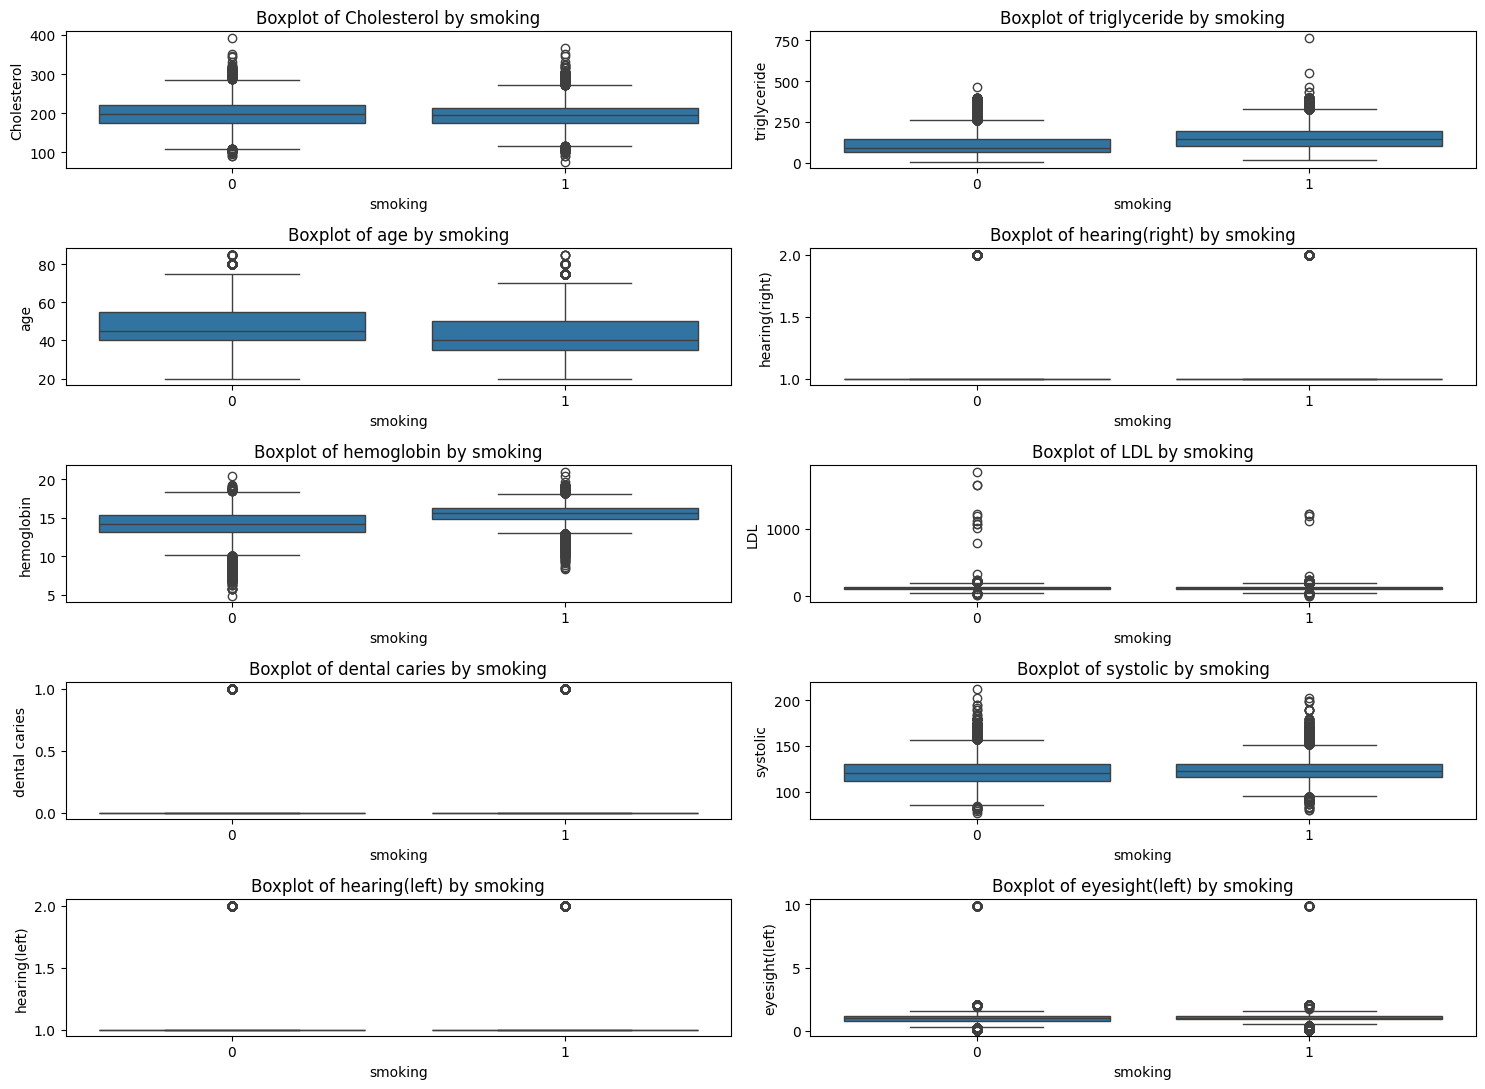

In [16]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 11))
axes = axes.flatten()
for i, feature in enumerate(['Cholesterol','triglyceride','age','hearing(right)','hemoglobin','LDL', 'dental caries', 'systolic','hearing(left)','eyesight(left)' ]):

    sns.boxplot(x='smoking', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} by smoking')

plt.tight_layout()
plt.show()



 Violin Plots

 In univariate analysis, violin plots are used to visualize the distribution of a single continuous variable. The plot displays the density estimation of the variable’s values, typically with a combination of a kernel density plot and a mirrored histogram. The width of the violin represents the density of data points at different values, with wider sections indicating higher density.

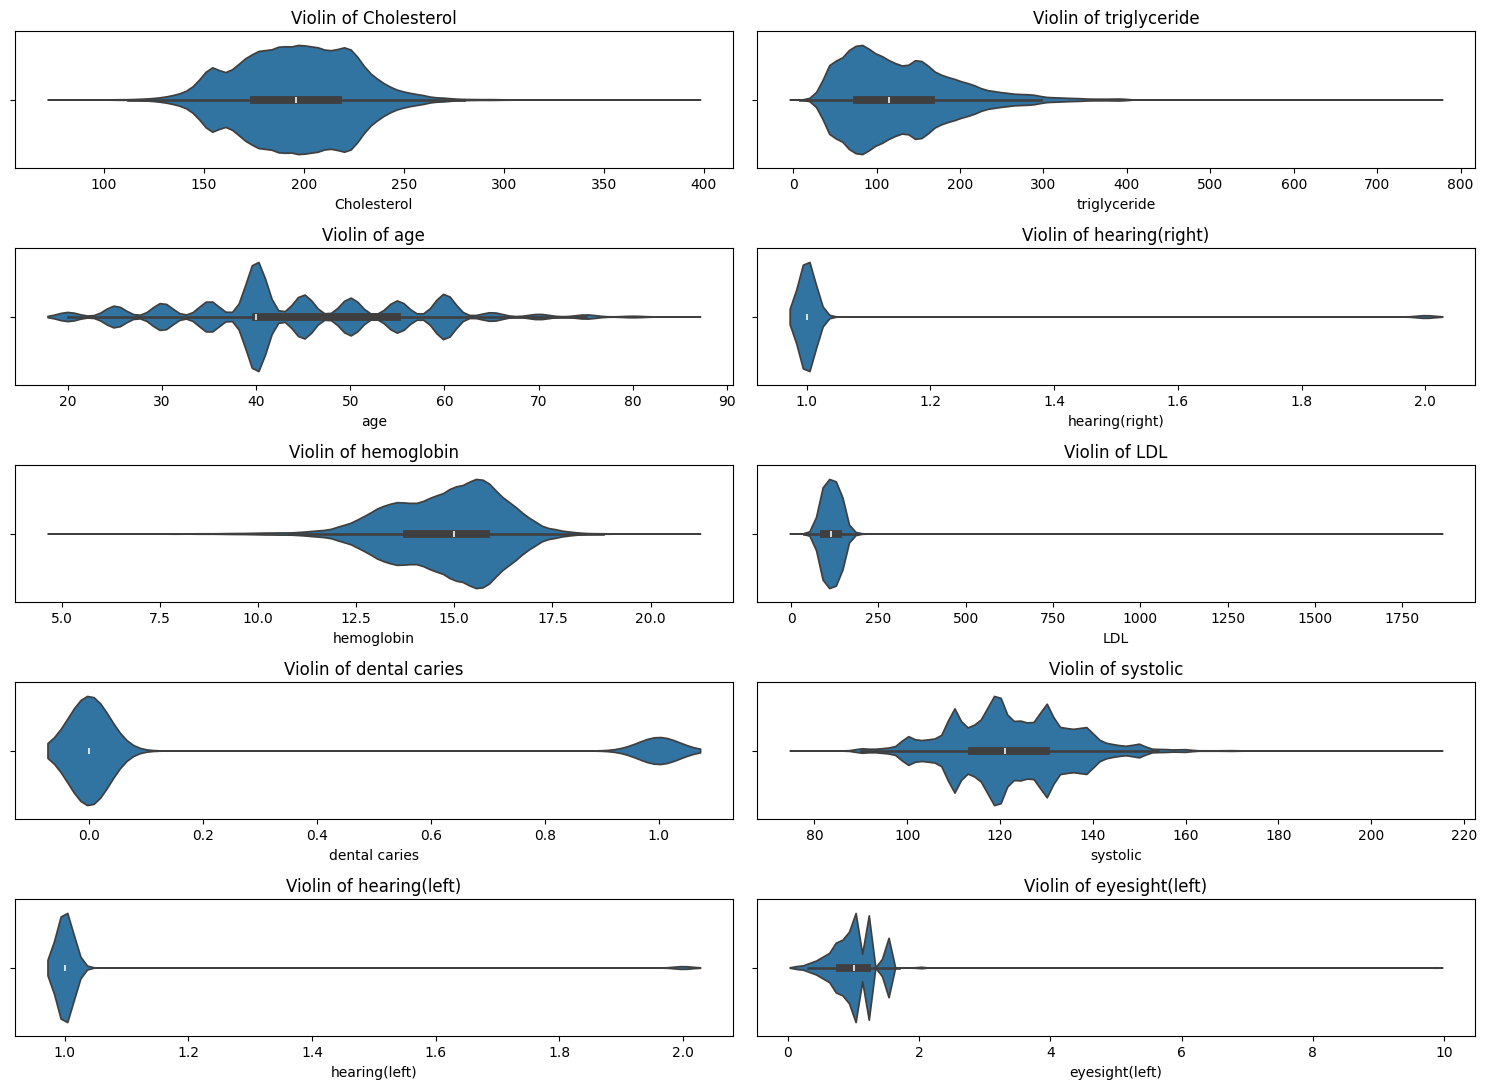

In [17]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 11))
axes = axes.flatten()
for i, feature in enumerate(['Cholesterol','triglyceride','age','hearing(right)','hemoglobin','LDL', 'dental caries', 'systolic','hearing(left)','eyesight(left)' ]):

    sns.violinplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Violin of {feature}')

plt.tight_layout()
plt.show()


-----------------------------------------------------------     Bivariate Analysis -----------------------------------------------------------------

In [18]:
print(df[['Cholesterol', 'systolic']].corr())

             Cholesterol  systolic
Cholesterol     1.000000  0.069044
systolic        0.069044  1.000000


Since the correlation is 0.069, this means there is no correlation between these two features.

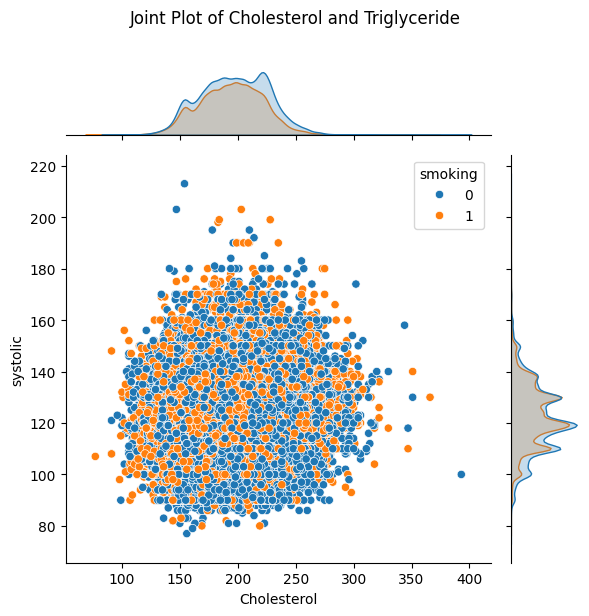

In [19]:
sns.jointplot(x='Cholesterol', y='systolic', data=df, kind='scatter',hue='smoking')
plt.suptitle('Joint Plot of Cholesterol and Triglyceride', y=1.02)
plt.tight_layout()
plt.show()

In the graph above, You can see there is a weak relation between the Cholisterol feature and the Systolic feature since you can deduce no pattern do decide whether a person smokes or not.


Another example comparing 2 feautres with each other

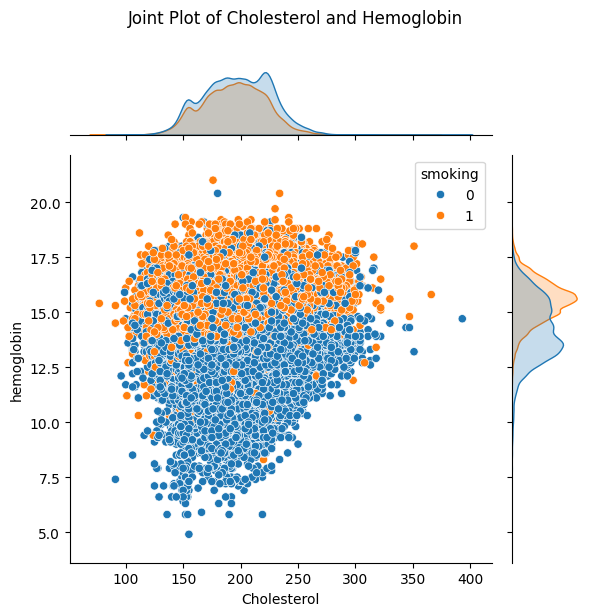

In [20]:
sns.jointplot(x='Cholesterol', y='hemoglobin', data=df, kind='scatter',hue='smoking')
plt.suptitle('Joint Plot of Cholesterol and Hemoglobin', y=1.02)
plt.tight_layout()
plt.show()

-------------------------------------------------------------  Multivariate Analysis ----------------------------------------------------------

Multivariate analysis looks at the relationships between multiple variables. It can help us understand how different variables interact with each other and how they affect the outcome of our analysis.

In [21]:

for  i,feature1  in enumerate(['Cholesterol','triglyceride','age','hearing(right)','hemoglobin','LDL', 'dental caries', 'systolic','hearing(left)','eyesight(left)' ]):
    print(f'\n                                 Correlation between feature: {feature1} and all other features:')
    for j, feature2 in enumerate(['Cholesterol','triglyceride','age','hearing(right)','hemoglobin','LDL', 'dental caries', 'systolic','hearing(left)','eyesight(left)' ]):
        if (feature1!=feature2):
            print(df[[feature1, feature2]].corr())
    print('-----------------------------------------------------------------------------------------------------------------------------')








                                 Correlation between feature: Cholesterol and all other features:
              Cholesterol  triglyceride
Cholesterol      1.000000      0.237904
triglyceride     0.237904      1.000000
             Cholesterol       age
Cholesterol     1.000000  0.106873
age             0.106873  1.000000
                Cholesterol  hearing(right)
Cholesterol        1.000000       -0.029276
hearing(right)    -0.029276        1.000000
             Cholesterol  hemoglobin
Cholesterol     1.000000    0.032104
hemoglobin      0.032104    1.000000
             Cholesterol       LDL
Cholesterol     1.000000  0.808533
LDL             0.808533  1.000000
               Cholesterol  dental caries
Cholesterol       1.000000      -0.024974
dental caries    -0.024974       1.000000
             Cholesterol  systolic
Cholesterol     1.000000  0.069044
systolic        0.069044  1.000000
               Cholesterol  hearing(left)
Cholesterol        1.00000       -0.02943
hearing(left)

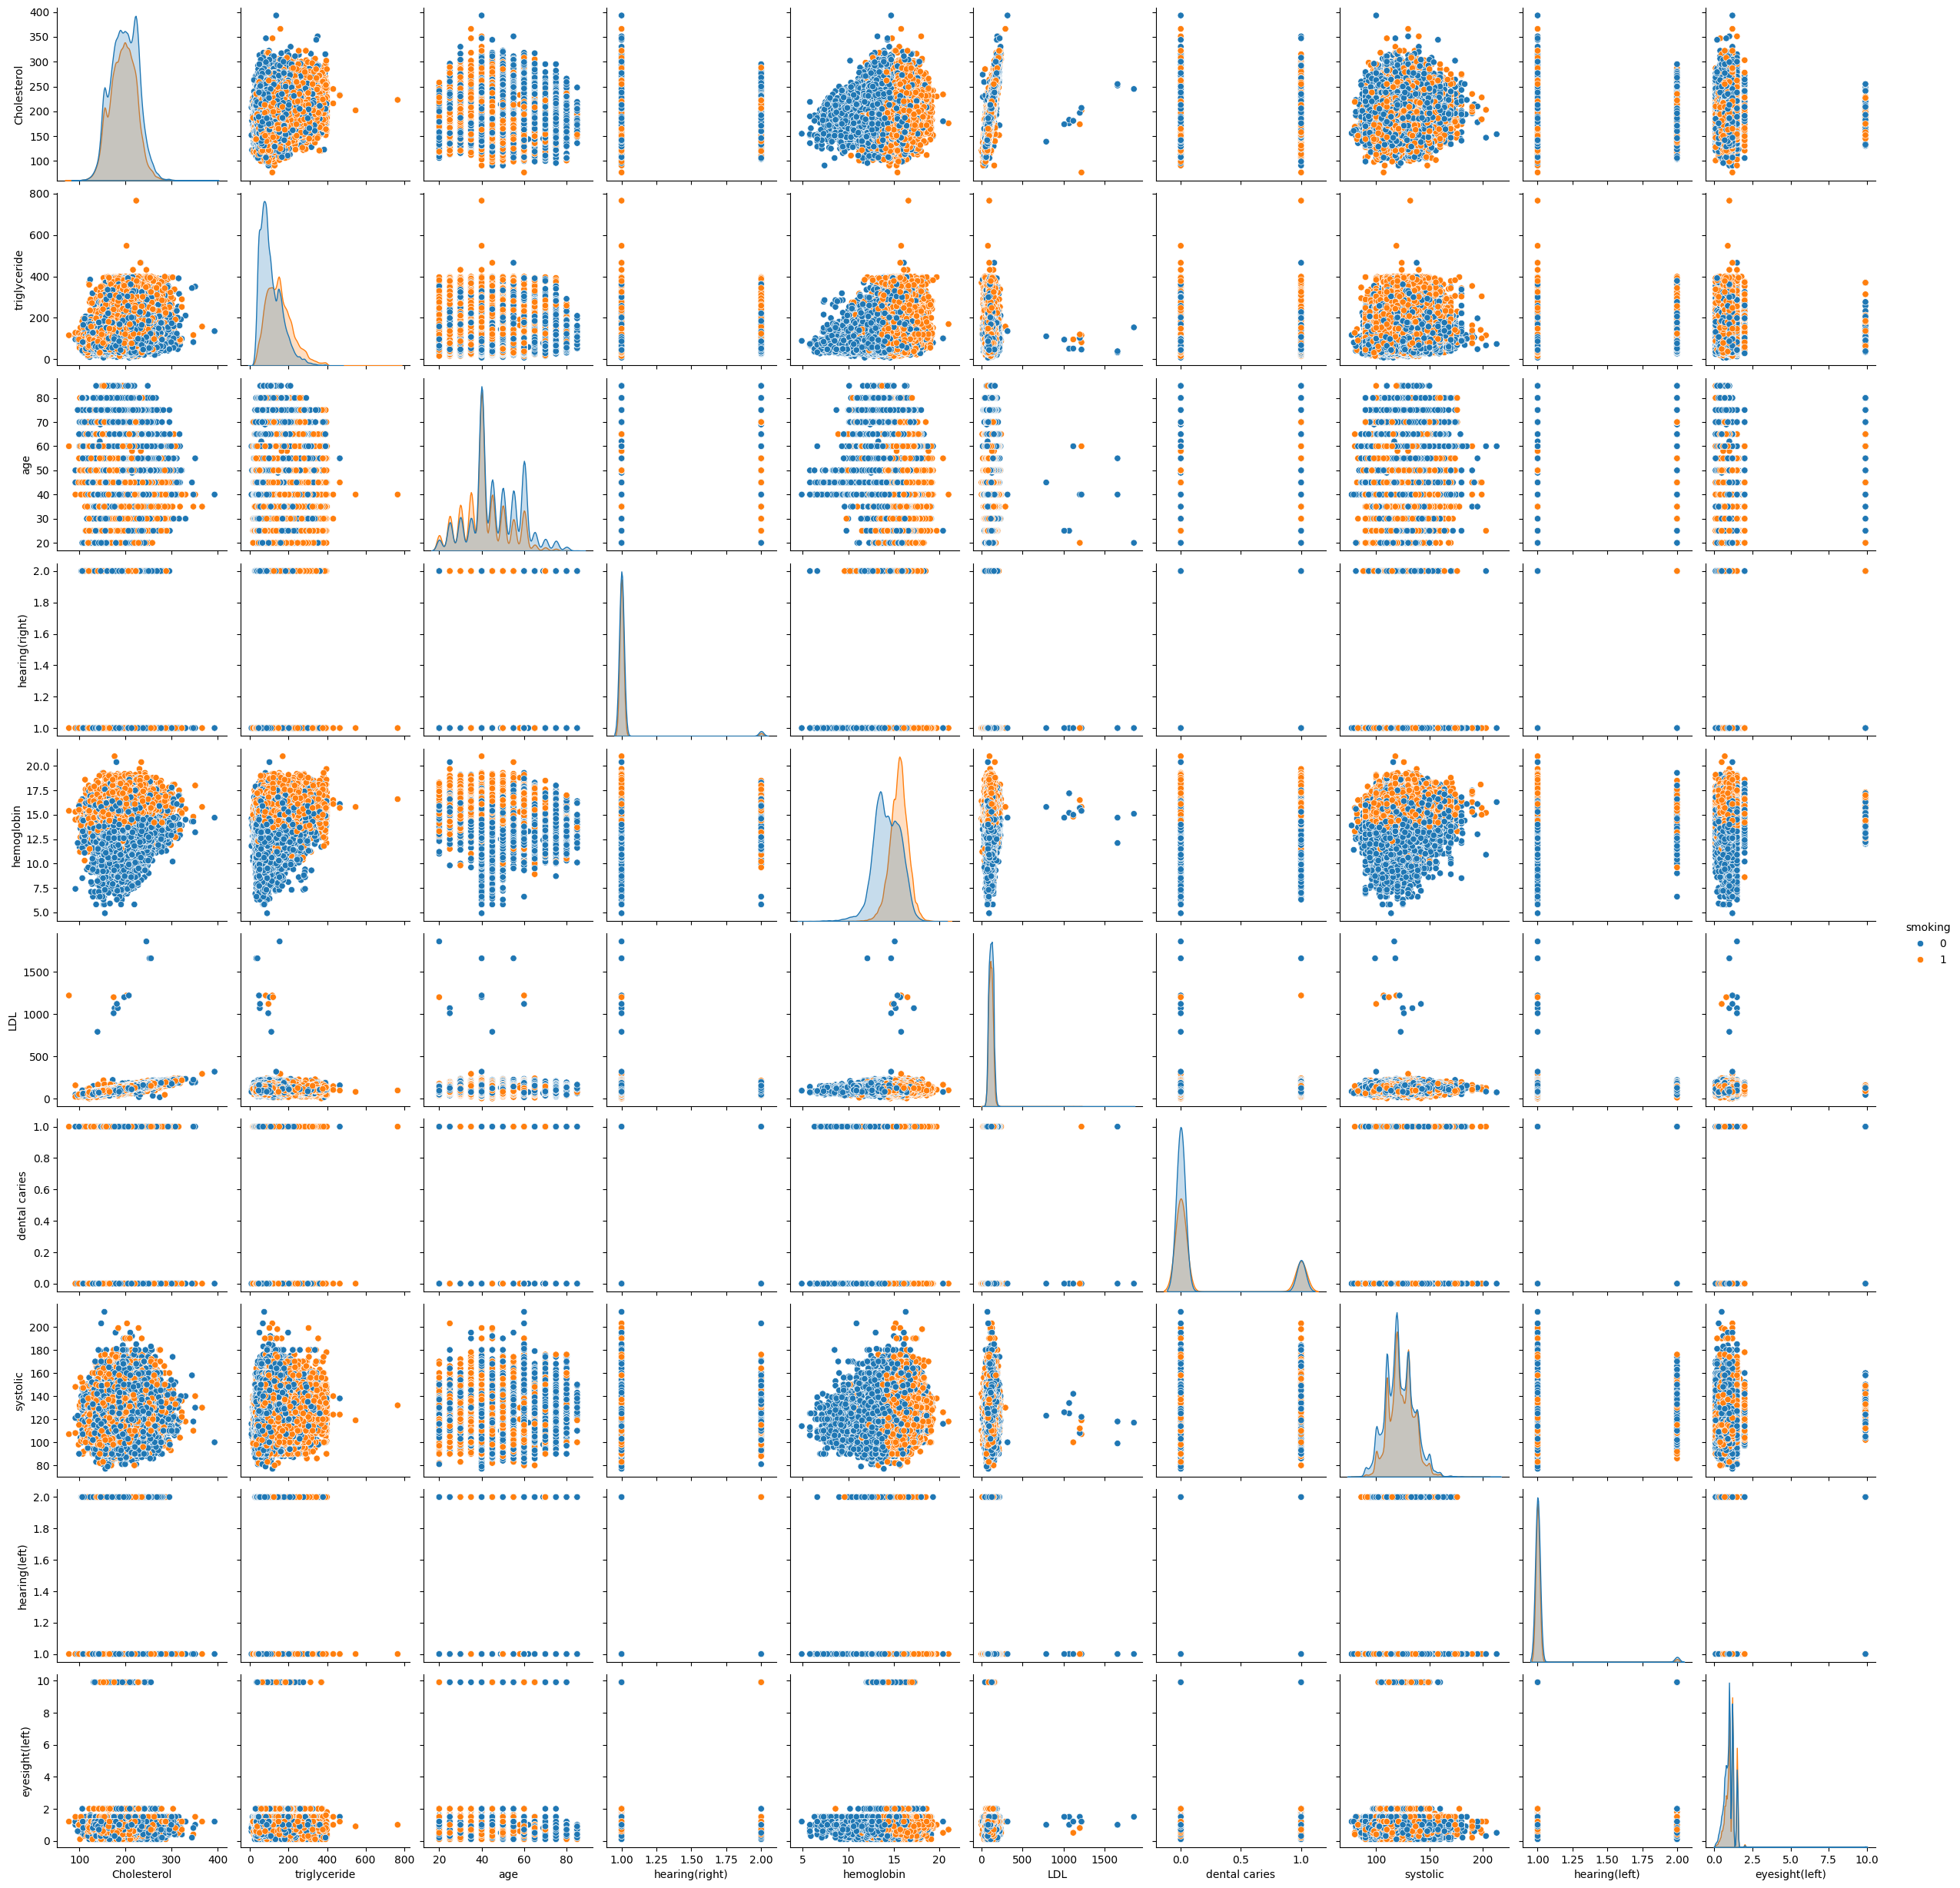

In [22]:
df_columns = ['Cholesterol','triglyceride','age','hearing(right)','hemoglobin','LDL', 'dental caries', 'systolic','hearing(left)','eyesight(left)','smoking']
selected_columns = df[df_columns]

#selected_columns = ['Cholesterol', 'triglyceride', 'age', 'hearing(right)', 'hemoglobin']
sns.pairplot(data=selected_columns,hue='smoking')
plt.show()

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(selected_columns.corr(), annot=True, cmap="PuBu")
plt.title('Heatmap of Correlation Matrix')
plt.show()


Splitting Data

In [40]:
X = df.drop(['smoking'], axis=1)
y = df['smoking']

from sklearn.model_selection import train_test_split
data = pd.DataFrame(X)
target = pd.Series(y)

x_train, x_rest, y_train, y_rest = train_test_split(data, target, test_size=0.3)

x_val, x_test, y_val, y_test = train_test_split(x_rest, y_rest, test_size=0.5)

%store x_train
%store x_val
%store x_test
%store y_train
%store y_val
%store y_test


Stored 'x_train' (DataFrame)
Stored 'x_val' (DataFrame)
Stored 'x_test' (DataFrame)
Stored 'y_train' (Series)
Stored 'y_val' (Series)
Stored 'y_test' (Series)


FEATURE ENGINEERING:

1. NORMALIZATION:

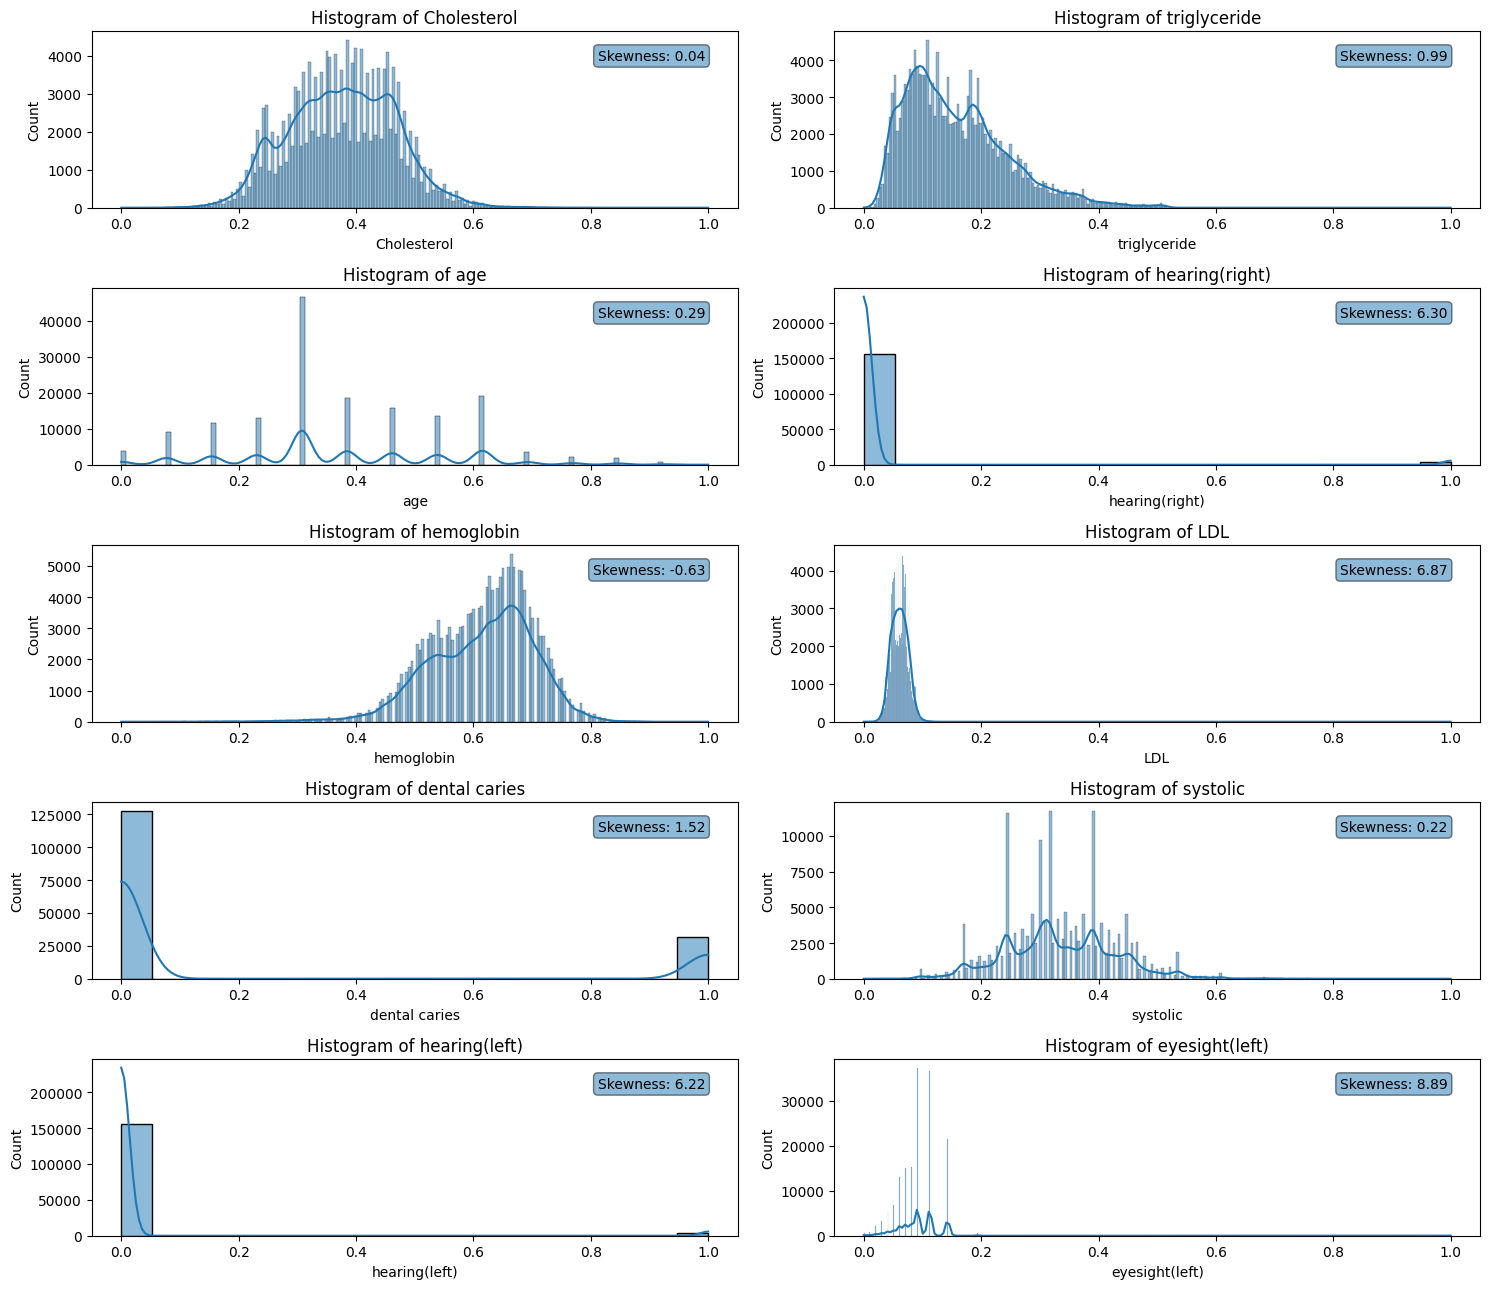

In [25]:
# MIN-MAX SCALING:

from sklearn.preprocessing import MinMaxScaler
df2=df

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(df2)

# Convert the scaled data into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df2.columns)

# # Create a MinMaxScaler object
# scaler = MinMaxScaler()

# # Fit and transform the DataFrame
# df_normalized = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

# # Print the scaled DataFrame
# print(df_normalized)

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 13))
axes = axes.flatten()

# kde=true :kernel density estimate on top of the histogram

for i, column_name in enumerate(['Cholesterol','triglyceride','age','hearing(right)','hemoglobin','LDL', 'dental caries', 'systolic','hearing(left)','eyesight(left)' ]):
    sns.histplot(scaled_df[column_name], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column_name}')
    skewness_value = skew(scaled_df[column_name])
    axes[i].text(0.95, 0.9, f'Skewness: {skewness_value:.2f}', transform=axes[i].transAxes, ha='right', va='top', bbox=dict(boxstyle='round', alpha=0.5))

plt.tight_layout()
plt.show()


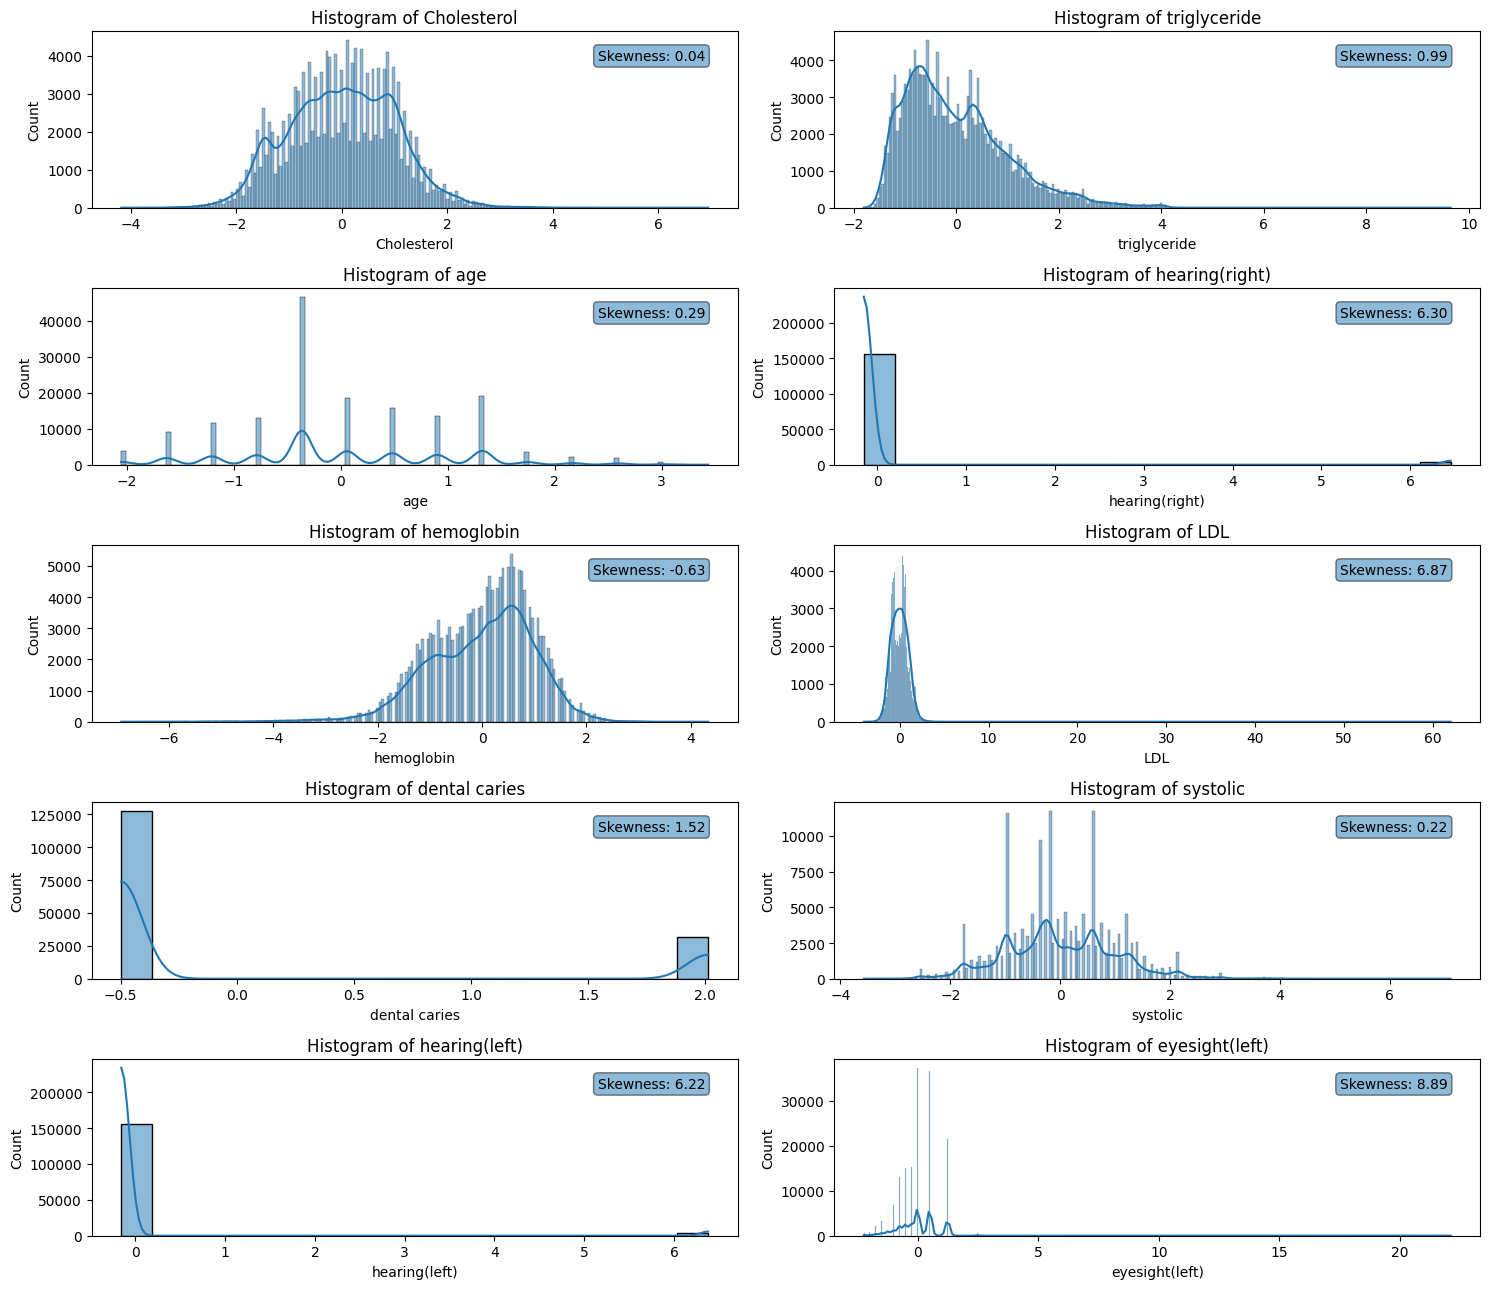

In [26]:
# Standardization using Z-score:
import numpy as np

# Calculate the mean and standard deviation for each column
mean = df.mean()
std = df.std()

# Subtract the mean and divide by the standard deviation
standardized_df = (df - mean) / std

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 13))
axes = axes.flatten()

# kde=true :kernel density estimate on top of the histogram

for i, column_name in enumerate(['Cholesterol','triglyceride','age','hearing(right)','hemoglobin','LDL', 'dental caries', 'systolic','hearing(left)','eyesight(left)' ]):
    sns.histplot(standardized_df[column_name], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column_name}')
    skewness_value = skew(standardized_df[column_name])
    axes[i].text(0.95, 0.9, f'Skewness: {skewness_value:.2f}', transform=axes[i].transAxes, ha='right', va='top', bbox=dict(boxstyle='round', alpha=0.5))

plt.tight_layout()
plt.show()

Notice that this yields more skewness, this is because some data processing methods assume data is normally distributed.


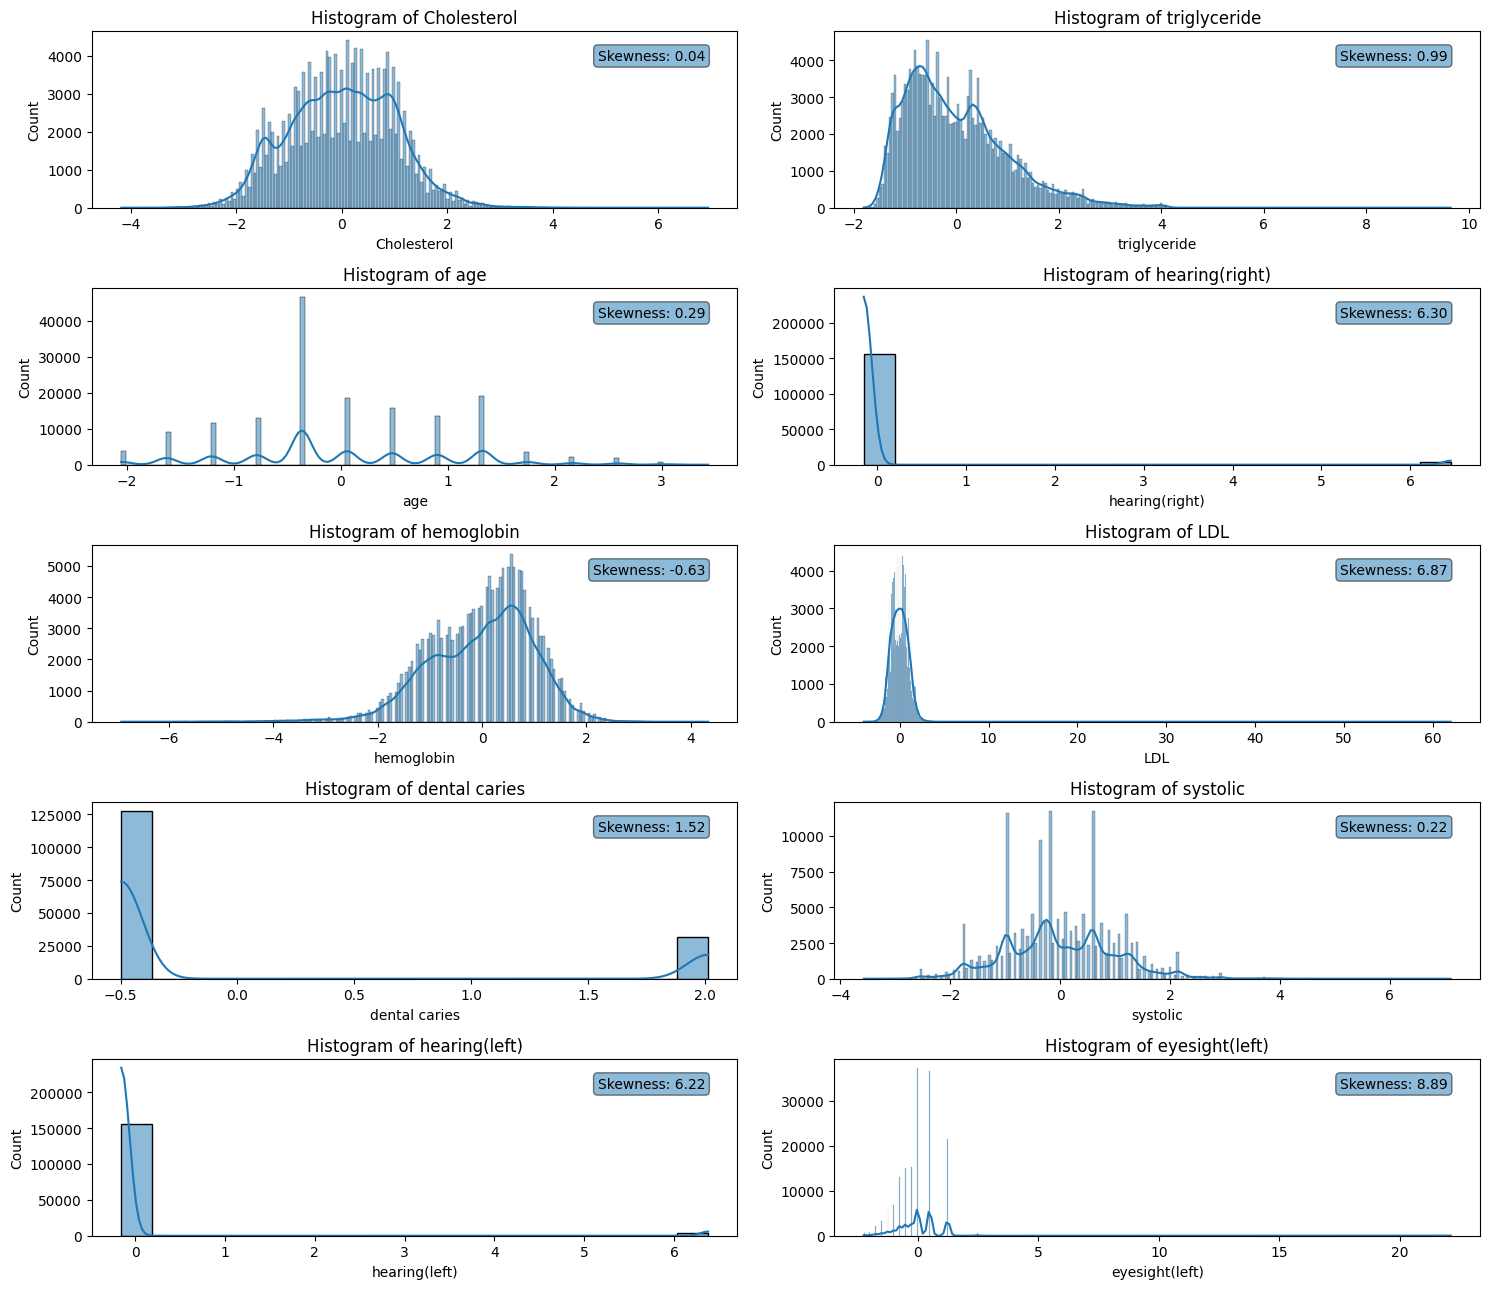

In [27]:
# trying method 2:
#standard
df3=df

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df3)
standard_scaled_df = pd.DataFrame(scaled_data, columns=df3.columns)

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 13))
axes = axes.flatten()

# kde=true :kernel density estimate on top of the histogram

for i, column_name in enumerate(['Cholesterol','triglyceride','age','hearing(right)','hemoglobin','LDL', 'dental caries', 'systolic','hearing(left)','eyesight(left)' ]):
    sns.histplot(standard_scaled_df[column_name], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column_name}')
    skewness_value = skew(standard_scaled_df[column_name])
    axes[i].text(0.95, 0.9, f'Skewness: {skewness_value:.2f}', transform=axes[i].transAxes, ha='right', va='top', bbox=dict(boxstyle='round', alpha=0.5))

plt.tight_layout()
plt.show()




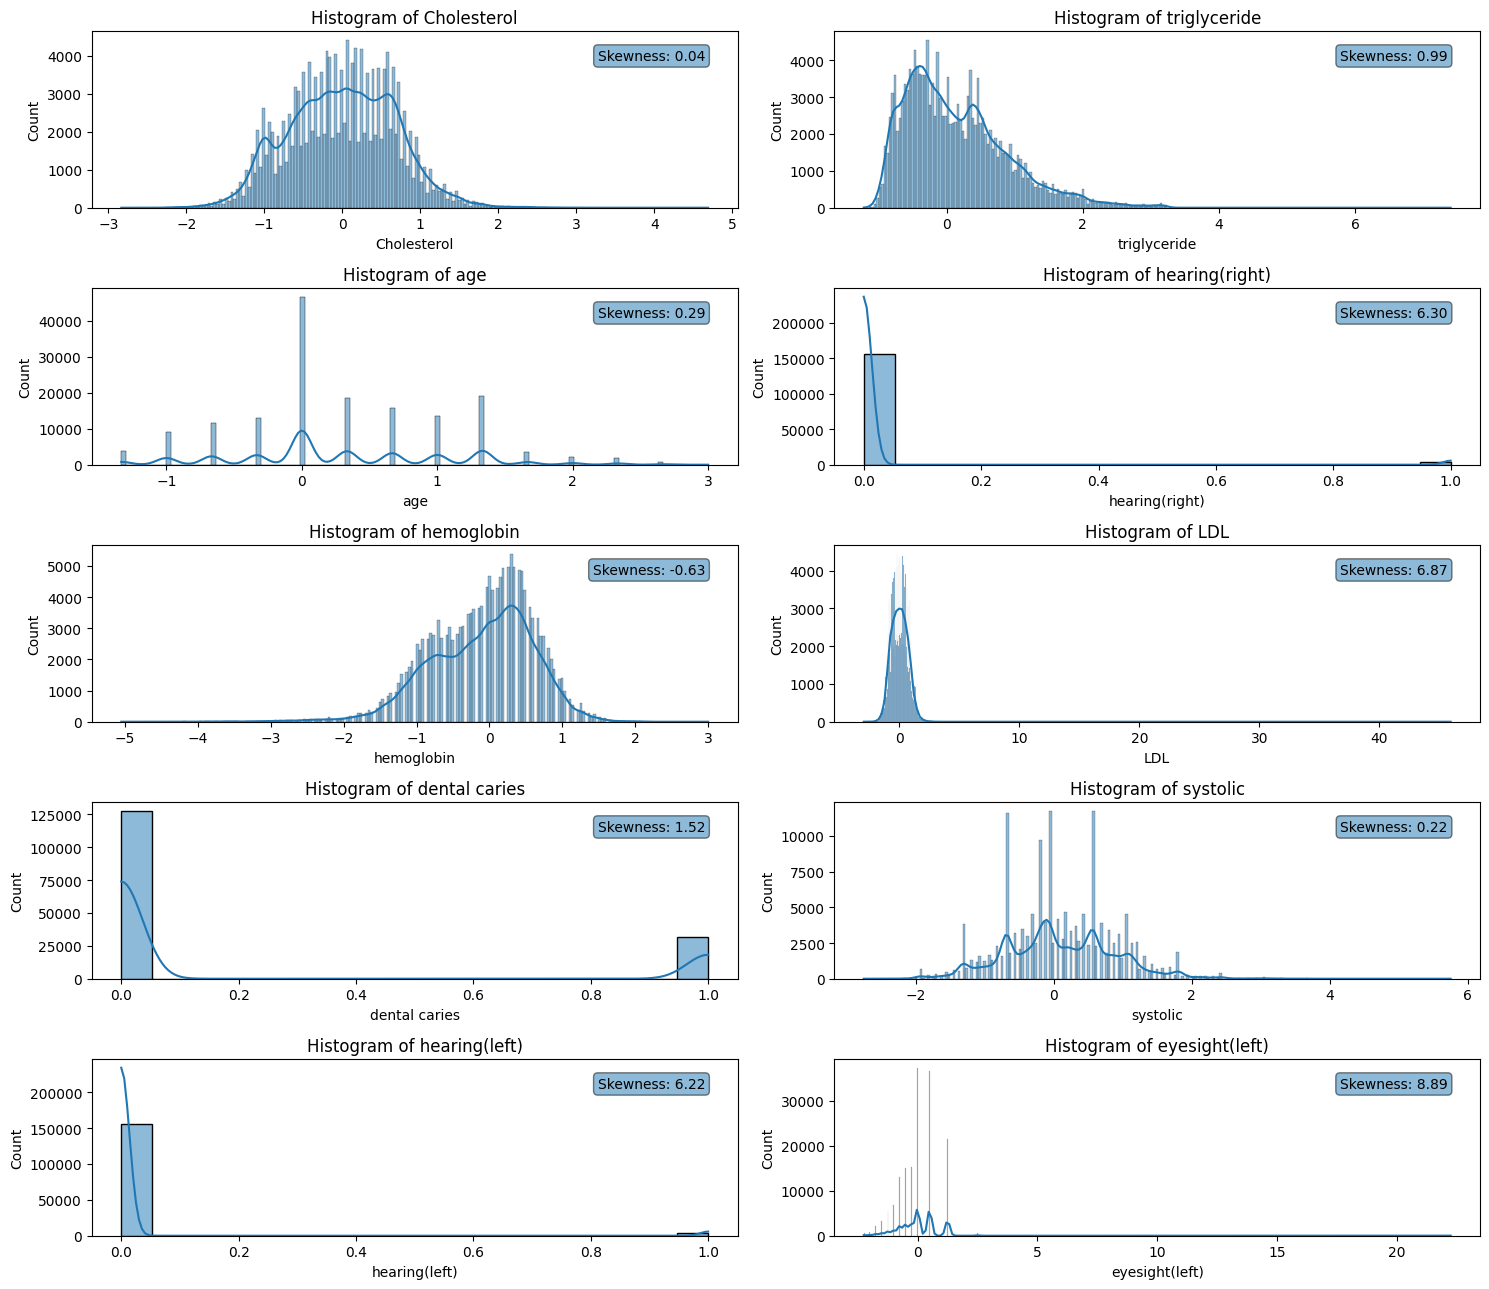

In [28]:
#robust
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(df3)
robust_scaled_df = pd.DataFrame(scaled_data, columns=df3.columns)


fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 13))
axes = axes.flatten()

# kde=true :kernel density estimate on top of the histogram

for i, column_name in enumerate(['Cholesterol','triglyceride','age','hearing(right)','hemoglobin','LDL', 'dental caries', 'systolic','hearing(left)','eyesight(left)' ]):
    sns.histplot(robust_scaled_df[column_name], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column_name}')
    skewness_value = skew(robust_scaled_df[column_name])
    axes[i].text(0.95, 0.9, f'Skewness: {skewness_value:.2f}', transform=axes[i].transAxes, ha='right', va='top', bbox=dict(boxstyle='round', alpha=0.5))

plt.tight_layout()
plt.show()







In [29]:
#log skew

import numpy as np

log_df = df3.apply(np.log1p)


fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 13))
axes = axes.flatten()

# kde=true :kernel density estimate on top of the histogram

for i, column_name in enumerate(['Cholesterol','triglyceride','age','hearing(right)','hemoglobin','LDL', 'dental caries', 'systolic','hearing(left)','eyesight(left)' ]):
    sns.histplot(log_df[column_name], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column_name}')
    skewness_value = skew(log_df[column_name])
    axes[i].text(0.95, 0.9, f'Skewness: {skewness_value:.2f}', transform=axes[i].transAxes, ha='right', va='top', bbox=dict(boxstyle='round', alpha=0.5))

plt.tight_layout()
plt.show()


In [30]:
#Preprocessing

df2=df
df2['Cholesterol']=np.log(df2['Cholesterol']+1)
df2['triglyceride']=np.log(df2['triglyceride']+1)
df2['age']=np.log(df2['age']+1)
df2['hearing(right)']=np.log(df2['hearing(right)']+1)
df2['hemoglobin']=np.log(df2['hemoglobin']+1)
df2['LDL']=np.log(df2['LDL']+1)
df2['dental caries']=np.log(df2['dental caries']+1)
df2['systolic']=np.log(df2['systolic']+1)
df2['hearing(left)']=np.log(df2['hearing(left)']+1)
df2['eyesight(left)']=np.log(df2['eyesight(left)']+1)
df2['smoking']=np.log(df2['smoking']+1)


fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 13))
axes = axes.flatten()

# kde=true :kernel density estimate on top of the histogram

for i, column_name in enumerate(['Cholesterol','triglyceride','age','hearing(right)','hemoglobin','LDL', 'dental caries', 'systolic','hearing(left)','eyesight(left)' ]):
    sns.histplot(df2[column_name], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column_name}')
    skewness_value = skew(df2[column_name])
    axes[i].text(0.95, 0.9, f'Skewness: {skewness_value:.2f}', transform=axes[i].transAxes, ha='right', va='top', bbox=dict(boxstyle='round', alpha=0.5))

plt.tight_layout()
plt.show()


2. Outlier Detection:

        Unnamed: 0  Cholesterol  triglyceride       age  hearing(right)  \
0         0.000000     0.300633      0.385224  0.538462             0.0   
1         0.000006     0.370253      0.062005  0.769231             NaN   
2         0.000013     0.319620      0.249340  0.000000             0.0   
3         0.000019     0.325949      0.257256  0.230769             0.0   
4         0.000025     0.246835      0.104222  0.153846             0.0   
...            ...          ...           ...       ...             ...   
159251    0.999975     0.509494      0.051451  0.307692             0.0   
159252    0.999981     0.430380      0.255937  0.461538             0.0   
159253    0.999987     0.354430      0.048813  0.307692             0.0   
159254    0.999994     0.278481      0.184697  0.461538             0.0   
159255    1.000000     0.344937      0.104222  0.307692             0.0   

        hemoglobin       LDL  dental caries  systolic  hearing(left)  \
0         0.720497  0.03980

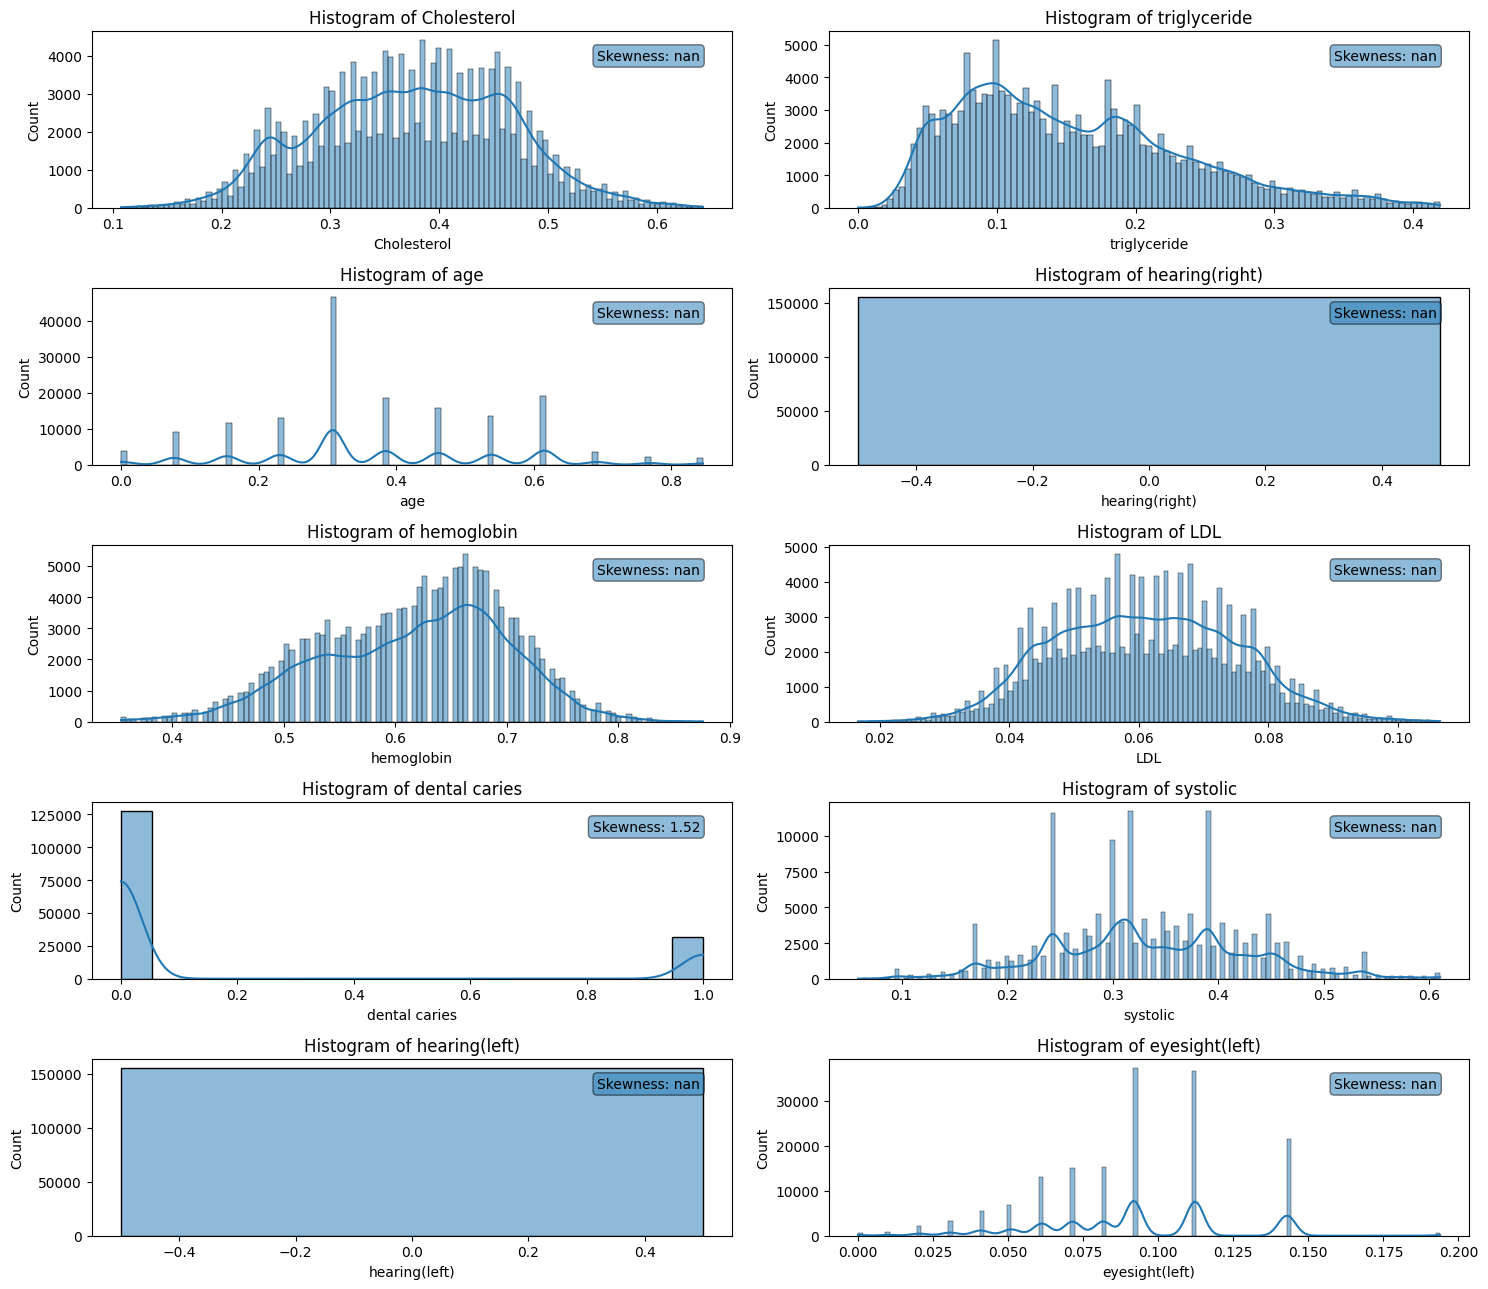

In [31]:
# Outlier Removal using Z-Score


#using minmax normalization
from scipy import stats

z_scores = stats.zscore(scaled_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
new_df_minmax = scaled_df[filtered_entries]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 13))
axes = axes.flatten()
print(new_df_minmax)

# kde=true :kernel density estimate on top of the histogram

for i, column_name in enumerate(['Cholesterol','triglyceride','age','hearing(right)','hemoglobin','LDL', 'dental caries', 'systolic','hearing(left)','eyesight(left)' ]):
    sns.histplot(new_df_minmax[column_name], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column_name}')
    skewness_value = skew(new_df_minmax[column_name])
    axes[i].text(0.95, 0.9, f'Skewness: {skewness_value:.2f}', transform=axes[i].transAxes, ha='right', va='top', bbox=dict(boxstyle='round', alpha=0.5))

plt.tight_layout()
plt.show()



In [32]:
# Outlier Removal using Z-Score
#using Z-score normalization
from scipy import stats

z_scores = stats.zscore(standardized_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
new_df_zscore = standardized_df[filtered_entries]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 13))
axes = axes.flatten()

# kde=true :kernel density estimate on top of the histogram

for i, column_name in enumerate(['Cholesterol','triglyceride','age','hearing(right)','hemoglobin','LDL', 'dental caries', 'systolic','hearing(left)','eyesight(left)' ]):
    sns.histplot(new_df_zscore[column_name], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column_name}')
    skewness_value = skew(new_df_zscore[column_name])
    axes[i].text(0.95, 0.9, f'Skewness: {skewness_value:.2f}', transform=axes[i].transAxes, ha='right', va='top', bbox=dict(boxstyle='round', alpha=0.5))

plt.tight_layout()
plt.show()



In [33]:
#reversing order:








In [34]:
# Outlier Removal using Z-Score
#using robust normalization

z_scores = stats.zscore(robust_scaled_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
new_df_robust = robust_scaled_df[filtered_entries]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 13))
axes = axes.flatten()

# kde=true :kernel density estimate on top of the histogram

for i, column_name in enumerate(['Cholesterol','triglyceride','age','hearing(right)','hemoglobin','LDL', 'dental caries', 'systolic','hearing(left)','eyesight(left)' ]):
    sns.histplot(new_df_robust[column_name], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column_name}')
    skewness_value = skew(new_df_robust[column_name])
    axes[i].text(0.95, 0.9, f'Skewness: {skewness_value:.2f}', transform=axes[i].transAxes, ha='right', va='top', bbox=dict(boxstyle='round', alpha=0.5))

plt.tight_layout()
plt.show()


In [35]:
# # Outlier Removal using Z-Score
# # Outlier Removal using IQR


# #usinng minmax normalization
# Q1 = selected_columns.quantile(0.25)
# Q3 = selected_columns.quantile(0.75)
# IQR = Q3 - Q1

# new_df_minmax2 = scaled_df[~((scaled_df < (Q1 - 1.5 * IQR)) | (scaled_df > (Q3 + 1.5 * IQR)))]

# fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 13))
# axes = axes.flatten()

# # kde=true :kernel density estimate on top of the histogram

# for i, column_name in enumerate(['Cholesterol','triglyceride','age','hearing(right)','hemoglobin','LDL', 'dental caries', 'systolic','hearing(left)','eyesight(left)' ]):
#     sns.histplot(new_df_minmax2[column_name], kde=True, ax=axes[i])
#     axes[i].set_title(f'Histogram of {column_name}')
#     skewness_value = skew(new_df_minmax2[column_name])
#     axes[i].text(0.95, 0.9, f'Skewness: {skewness_value:.2f}', transform=axes[i].transAxes, ha='right', va='top', bbox=dict(boxstyle='round', alpha=0.5))

# plt.tight_layout()
# plt.show()





In [36]:
# # Outlier Removal using Z-Score
# #using z-score normalization
# Q1 = selected_columns.quantile(0.25)
# Q3 = selected_columns.quantile(0.75)
# IQR = Q3 - Q1

# new_df_zscore2 = standardized_df[~((standardized_df < (Q1 - 1.5 * IQR)) | (standardized_df > (Q3 + 1.5 * IQR)))]

# fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 13))
# axes = axes.flatten()

# # kde=true :kernel density estimate on top of the histogram

# for i, column_name in enumerate(['Cholesterol','triglyceride','age','hearing(right)','hemoglobin','LDL', 'dental caries', 'systolic','hearing(left)','eyesight(left)' ]):
#     sns.histplot(new_df_zscore2[column_name], kde=True, ax=axes[i])
#     axes[i].set_title(f'Histogram of {column_name}')
#     skewness_value = skew(new_df_zscore2[column_name])
#     axes[i].text(0.95, 0.9, f'Skewness: {skewness_value:.2f}', transform=axes[i].transAxes, ha='right', va='top', bbox=dict(boxstyle='round', alpha=0.5))

# plt.tight_layout()
# plt.show()

In [37]:
# # Outlier Removal using Z-Score
# #using robust normalization
# Q1 = selected_columns.quantile(0.25)
# Q3 = selected_columns.quantile(0.75)
# IQR = Q3 - Q1

# new_df_robust2 = robust_scaled_df[~((robust_scaled_df < (Q1 - 1.5 * IQR)) | (robust_scaled_df > (Q3 + 1.5 * IQR)))]
# print(new_df_robust2)

# fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 13))
# axes = axes.flatten()

# # kde=true :kernel density estimate on top of the histogram

# for i, column_name in enumerate(['Cholesterol','triglyceride','age','hearing(right)','hemoglobin','LDL', 'dental caries', 'systolic','hearing(left)','eyesight(left)' ]):
#     sns.histplot(new_df_robust2[column_name], kde=True, ax=axes[i])
#     axes[i].set_title(f'Histogram of {column_name}')
#     skewness_value = skew(new_df_robust2[column_name])
#     axes[i].text(0.95, 0.9, f'Skewness: {skewness_value:.2f}', transform=axes[i].transAxes, ha='right', va='top', bbox=dict(boxstyle='round', alpha=0.5))

# plt.tight_layout()
# plt.show()

In [38]:
# Outlier Removal using Robust
# from scipy import stats
# from scipy.stats import robust


# z_scores = robust.robust_zscore(selected_columns)
# filtered_entries = (z_scores > -3) & (z_scores < 3)
# new_df = df[filtered_entries]
